In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from matplotlib.pyplot import figure
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
ausland_cleaned_csv = pd.read_csv("cleaned_data_ausland.csv",  delimiter=",")
ausland_cleaned_csv.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff
0,2021-01-01,17.132115,189.467425,18392.056339
1,2021-01-02,57.353725,97.000000,150.353614
2,2021-01-03,114.746857,60.000000,589.032382
3,2021-01-04,113.251181,95.000000,272.403917
4,2021-01-05,4.186462,4.000000,-30.435265


In [3]:
ausland_cleaned_csv['Umsatz_C_diff'][0] = ausland_cleaned_csv['Umsatz_C_diff'].median()
ausland_cleaned_csv.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2508\1981627072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ausland_cleaned_csv['Umsatz_C_diff'][0] = ausland_cleaned_csv['Umsatz_C_diff'].median()


,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff
0,2021-01-01,17.132115,189.467425,459.380813
1,2021-01-02,57.353725,97.000000,150.353614
2,2021-01-03,114.746857,60.000000,589.032382
3,2021-01-04,113.251181,95.000000,272.403917
4,2021-01-05,4.186462,4.000000,-30.435265


In [4]:
ausland_tages = ausland_cleaned_csv.copy()
ausland_tages.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff
0,2021-01-01,17.132115,189.467425,459.380813
1,2021-01-02,57.353725,97.000000,150.353614
2,2021-01-03,114.746857,60.000000,589.032382
3,2021-01-04,113.251181,95.000000,272.403917
4,2021-01-05,4.186462,4.000000,-30.435265


In [5]:
#ausland_tages.set_index('Datum', inplace=True)


In [6]:
#def resample_and_plot(resampling_freq):
 #   resampled_df = ausland_tages.resample(resampling_freq).mean()
  #  plt.rcParams['figure.figsize'] = [15, 6] #plt.figure(figsize=(15, 10))
   # resampled_df.plot(kind='line')
    #plt.title(f'Resampled Data - {resampling_freq}')
    #plt.xlabel('Datum')
    #plt.ylabel('Mean des Umsatzes')
    #plt.grid(True)
    #plt.show()

# Slider zur Auswahl des Resampling-Zeitraums erstellen
#resampling_slider = widgets.SelectionSlider(
    #options=['D', 'W', 'M'],   # , 'Q', 'Y'
    #value='D',
    #description='Resampling:',
    #continuous_update=False
#)

# Interaktive Ausgabe anzeigen
#widgets.interactive(resample_and_plot, resampling_freq=resampling_slider)

In [7]:
ausland_tages = ausland_tages.reset_index()

In [8]:
ausland_tages['Datum'] = pd.to_datetime(ausland_tages['Datum'])

ausland_tages['Wochentag'] = ausland_tages['Datum'].dt.strftime('%A')
ausland_tages['Kalenderwoche'] = ausland_tages['Datum'].dt.strftime('%W')
ausland_tages['Monat'] = ausland_tages['Datum'].dt.strftime('%B')
ausland_tages

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff,Wochentag,Kalenderwoche,Monat
0,2021-01-01,17.132115,189.467425,459.380813,Friday,00,January
1,2021-01-02,57.353725,97.000000,150.353614,Saturday,00,January
2,2021-01-03,114.746857,60.000000,589.032382,Sunday,00,January
3,2021-01-04,113.251181,95.000000,272.403917,Monday,01,January
4,2021-01-05,4.186462,4.000000,-30.435265,Tuesday,01,January
...,...,...,...,...,...,...,...
360,2021-12-27,48.681712,15.000000,832.146749,Monday,52,December
361,2021-12-28,54.774542,64.000000,35.506069,Tuesday,52,December
362,2021-12-29,151.450508,43.000000,200.759534,Wednesday,52,December
363,2021-12-30,39.406492,99.000000,739.214117,Thursday,52,December


In [13]:
ausland_tages['Gesamtumsatz'] = ausland_tages['Umsatz_A'] + ausland_tages['Umsatz_B_diff'] + ausland_tages['Umsatz_C_diff']

In [14]:
ausland_tages

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff,Wochentag,Kalenderwoche,Monat,Gesamtumsatz
0,2021-01-01,17.132115,189.467425,459.380813,Friday,00,January,665.980354
1,2021-01-02,57.353725,97.000000,150.353614,Saturday,00,January,304.707340
2,2021-01-03,114.746857,60.000000,589.032382,Sunday,00,January,763.779239
3,2021-01-04,113.251181,95.000000,272.403917,Monday,01,January,480.655099
4,2021-01-05,4.186462,4.000000,-30.435265,Tuesday,01,January,-22.248803
...,...,...,...,...,...,...,...,...
360,2021-12-27,48.681712,15.000000,832.146749,Monday,52,December,895.828460
361,2021-12-28,54.774542,64.000000,35.506069,Tuesday,52,December,154.280612
362,2021-12-29,151.450508,43.000000,200.759534,Wednesday,52,December,395.210042
363,2021-12-30,39.406492,99.000000,739.214117,Thursday,52,December,877.620608


C:\Users\User\AppData\Local\Temp\ipykernel_2508\2770039523.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ausland_tages.groupby(['Wochentag']).sum () \


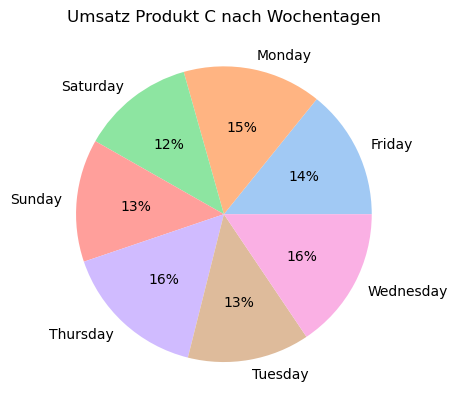

In [15]:
colors = sns.color_palette('pastel')
ausland_tages.groupby(['Wochentag']).sum () \
                                        .plot(kind='pie', \
                                            y='Umsatz_C_diff', \
                                            autopct='%1.0f%%', \
                                            legend=False,colors = colors, \
                                            title='Umsatz Produkt C nach Wochentagen')
plt.ylabel("")
plt.savefig(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Diagrame\Pie_C_Tage")

C:\Users\User\AppData\Local\Temp\ipykernel_2508\3683778021.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ausland_tages.groupby(['Wochentag']).sum () \


Text(0, 0.5, '')

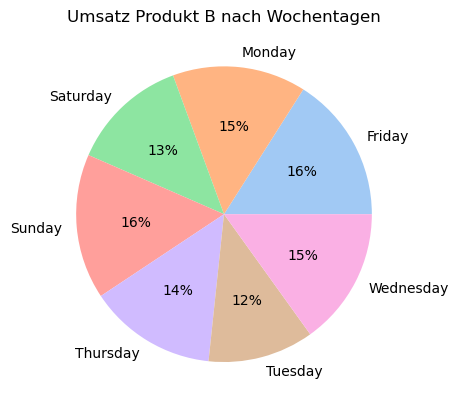

In [10]:
colors = sns.color_palette('pastel')
ausland_tages.groupby(['Wochentag']).sum () \
                                        .plot(kind='pie', \
                                            y='Umsatz_B_diff', \
                                            autopct='%1.0f%%', \
                                            legend=False,colors = colors, \
                                            title='Umsatz Produkt B nach Wochentagen')
plt.ylabel("")
#plt.savefig(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Diagrame\Pie_B_Tage")

C:\Users\User\AppData\Local\Temp\ipykernel_2508\3640293903.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ausland_tages.groupby(['Wochentag']).sum () \


Text(0, 0.5, '')

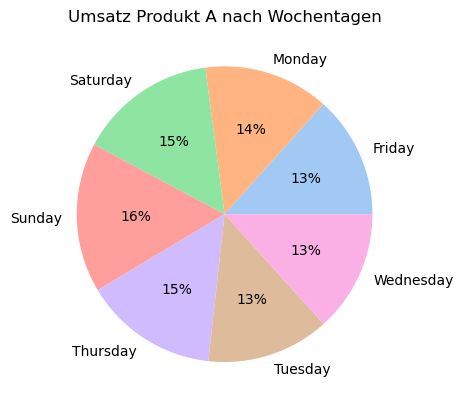

In [11]:
colors = sns.color_palette('pastel')
ausland_tages.groupby(['Wochentag']).sum () \
                                        .plot(kind='pie', \
                                            y='Umsatz_A', \
                                            autopct='%1.0f%%', \
                                            legend=False,colors = colors, \
                                            title='Umsatz Produkt A nach Wochentagen')
plt.ylabel("")
#plt.savefig(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Diagrame\Pie_A_Tage")

C:\Users\User\AppData\Local\Temp\ipykernel_2508\2802849519.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ausland_tages.groupby(['Wochentag']).sum () \


Text(0, 0.5, '')

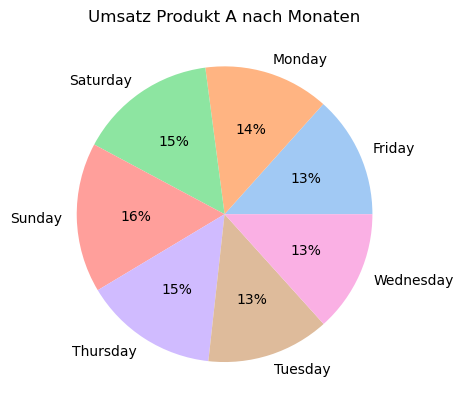

In [12]:
colors = sns.color_palette('pastel')
ausland_tages.groupby(['Monat']).sum () \
                                        .plot(kind='pie', \
                                            y='Umsatz_A', \
                                            autopct='%1.0f%%', \
                                            legend=False,colors = colors, \
                                            title='Umsatz Produkt A nach Monaten')
plt.ylabel("")
#plt.savefig(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Diagrame\Pie_A_Tage")

In [ ]:
def update_pie_chart(selected_category):
    filtered_df = ausland_tages[ausland_tages['Wochentag'] == selected_category]
    
    fig = px.pie(filtered_df, values='Umsatz_C_diff', names='Wochentage', title=f'Pie Chart for {selected_category}')
    return fig

In [ ]:
resampling_slider = widgets.SelectionSlider(
    options=['D', 'W', 'M'],   # , 'Q', 'Y'
    value='D',
    description='Resampling:',
    continuous_update=False
)

# Interaktive Ausgabe anzeigen
widgets.interactive(resample_and_plot, resampling_freq=resampling_slider)

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.lineplot(x=ausland_cleaned_csv.index, y=(ausland_cleaned_csv['Umsatz_A']))
sns.lineplot(x=ausland_cleaned_csv.index, y=(ausland_cleaned_csv['Umsatz_B_diff']))
sns.lineplot(x=ausland_cleaned_csv.index, y=(ausland_cleaned_csv['Umsatz_C_diff']))
# Show the plot
plt.show()